In [3]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

.**Let’s read the data into a DataFrame, and get the shape of the data and the first 5 records.**



In [5]:
df=pd.read_csv('/content/news.csv', error_bad_lines=False)
df.shape
df.head()

b'Skipping line 4693: expected 4 fields, saw 7\nSkipping line 4694: expected 4 fields, saw 8\nSkipping line 4696: expected 4 fields, saw 6\nSkipping line 4697: expected 4 fields, saw 7\nSkipping line 4698: expected 4 fields, saw 6\nSkipping line 4699: expected 4 fields, saw 8\nSkipping line 4700: expected 4 fields, saw 6\nSkipping line 4701: expected 4 fields, saw 7\nSkipping line 4702: expected 4 fields, saw 7\nSkipping line 4703: expected 4 fields, saw 5\nSkipping line 4704: expected 4 fields, saw 5\nSkipping line 4705: expected 4 fields, saw 8\nSkipping line 4706: expected 4 fields, saw 6\nSkipping line 4709: expected 4 fields, saw 5\nSkipping line 4710: expected 4 fields, saw 8\nSkipping line 4711: expected 4 fields, saw 9\nSkipping line 4712: expected 4 fields, saw 9\n'


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [15]:
df.dropna(inplace=True)

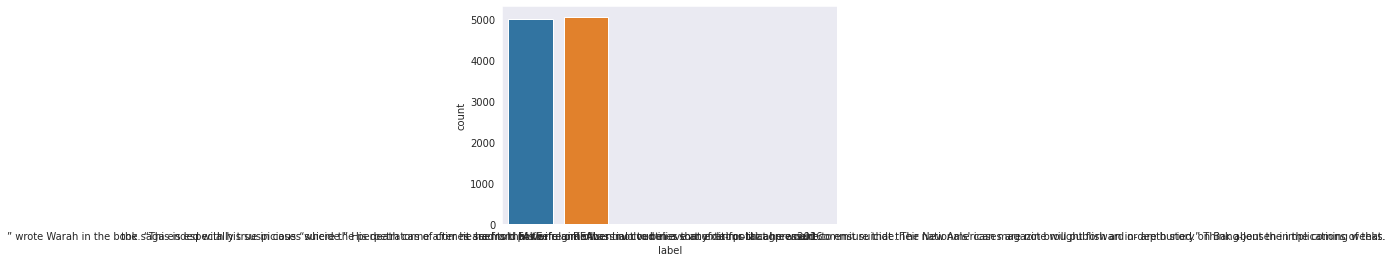

In [16]:
sns.set_style("dark")
sns.countplot(df.label)

In [17]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

**Get the labels from the DataFrame,they should be our prediction values for the model**

In [18]:
labels = df.label

**Spliting the dataset in traning and testing**

In [19]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

**Let’s initialize a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded). Stop words are the most common words in a language that are to be filtered out before processing the natural language data. And a TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.Then fit and transform the vectorizer on the train set, and transform the vectorizer on the test set**

In [20]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=.9)
#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

** Next, we’ll initialize a PassiveAggressiveClassifier. This is. We’ll fit this on tfidf_train and y_train.Then, we’ll predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score() from sklearn.metrics.**

In [23]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=20)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')


Accuracy: 97.61%


# **Summary**
I took a political dataset, implemented a TfidfVectorizer, initialized a PassiveAggressiveClassifier, and fit the model.I ended up obtaining an accuracy of 92.82% in magnitude with a simple piece of code.